## Importing Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Loading the dataset

In [6]:
df = pd.read_csv('/data_application_energy.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


## Data Wrangling and Feature Engineering

In [8]:
import pandas as pd
print(df.head()) # Changed 'data' to 'df'
print(df.info()) # Changed 'data' to 'df'

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

## Data Cleaning

In [9]:
import pandas as pd

data = pd.read_csv('/data_application_energy.csv')

data.drop_duplicates(inplace=True)

for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    data[column].fillna(data[column].mean(), inplace=True)

for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print(data.head())
print(data.info())

                   date  Appliances  lights         T1       RH_1     T2  \
51  2016-01-12 01:30:00          50       0  20.926667  45.590000  20.29   
52  2016-01-12 01:40:00          40       0  20.890000  45.666667  20.23   
53  2016-01-12 01:50:00          50       0  20.890000  46.060000  20.20   
54  2016-01-12 02:00:00          40       0  20.790000  46.200000  20.20   
55  2016-01-12 02:10:00          50       0  20.790000  46.200000  20.10   

         RH_2         T3    RH_3         T4  ...         T9       RH_9  \
51  44.290000  20.166667  45.530  21.890000  ...  16.890000  46.290000   
52  44.290000  20.133333  45.500  21.823333  ...  16.890000  46.433333   
53  44.400000  20.200000  45.500  21.666667  ...  16.890000  46.633333   
54  44.466667  20.166667  45.500  21.533333  ...  16.890000  46.826667   
55  44.530000  20.125000  45.425  21.356667  ...  16.963333  46.966667   

       T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  \
51  5.150000   737.900000  

## Removing Null Values

In [10]:
data.dropna(inplace=True)

print(data.head())
print(data.info())


                   date  Appliances  lights         T1       RH_1     T2  \
51  2016-01-12 01:30:00          50       0  20.926667  45.590000  20.29   
52  2016-01-12 01:40:00          40       0  20.890000  45.666667  20.23   
53  2016-01-12 01:50:00          50       0  20.890000  46.060000  20.20   
54  2016-01-12 02:00:00          40       0  20.790000  46.200000  20.20   
55  2016-01-12 02:10:00          50       0  20.790000  46.200000  20.10   

         RH_2         T3    RH_3         T4  ...         T9       RH_9  \
51  44.290000  20.166667  45.530  21.890000  ...  16.890000  46.290000   
52  44.290000  20.133333  45.500  21.823333  ...  16.890000  46.433333   
53  44.400000  20.200000  45.500  21.666667  ...  16.890000  46.633333   
54  44.466667  20.166667  45.500  21.533333  ...  16.890000  46.826667   
55  44.530000  20.125000  45.425  21.356667  ...  16.963333  46.966667   

       T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  \
51  5.150000   737.900000  

## Data Processing

In [11]:
import pandas as pd

categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, dummy_na=False)

# Scale numerical features using standardization
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Check the updated dataset
print(data.head())
print(data.info())


    Appliances  lights        T1      RH_1        T2      RH_2        T3  \
51   -0.473706     0.0 -0.466161  1.746360  0.131339  1.087848 -1.185157   
52   -0.868891     0.0 -0.492308  1.769122  0.098018  1.087848 -1.204421   
53   -0.473706     0.0 -0.492308  1.885901  0.081357  1.118390 -1.165893   
54   -0.868891     0.0 -0.563619  1.927466  0.081357  1.136900 -1.185157   
55   -0.473706     0.0 -0.563619  1.927466  0.025822  1.154485 -1.209237   

        RH_3        T4      RH_4  ...  date_2016-05-27 06:10:00  \
51  2.256795  0.613947  2.145598  ...                     False   
52  2.246708  0.577221  1.958200  ...                     False   
53  2.246708  0.490917  1.915994  ...                     False   
54  2.246708  0.417466  1.883917  ...                     False   
55  2.221491  0.320144  1.875475  ...                     False   

    date_2016-05-27 06:20:00  date_2016-05-27 06:30:00  \
51                     False                     False   
52                     F

## Splitting the Data


In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('Appliances', axis=1)  # Replace 'target_variable' with your actual target column name
y = data['Appliances']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8084, 10133)
X_test shape: (2022, 10133)
y_train shape: (8084,)
y_test shape: (2022,)


## 5 EDA Purposes

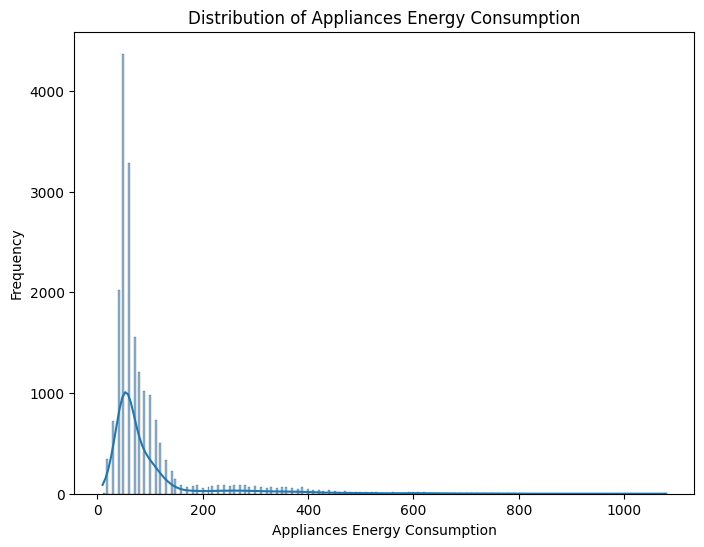

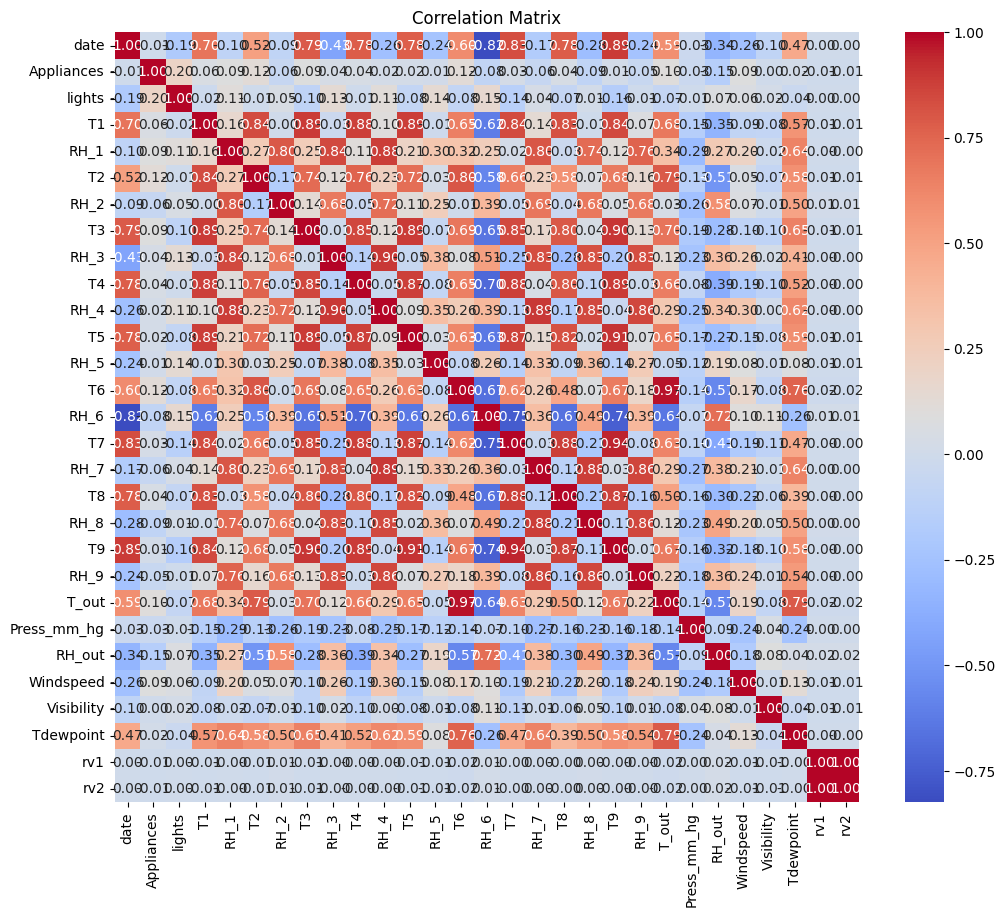

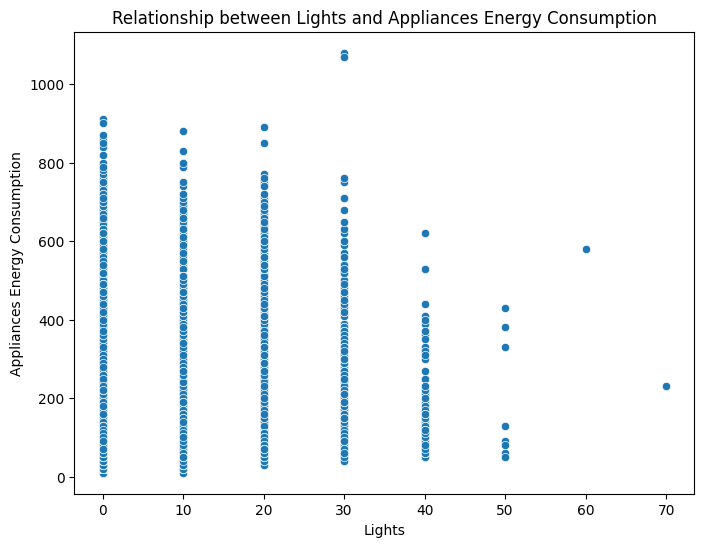

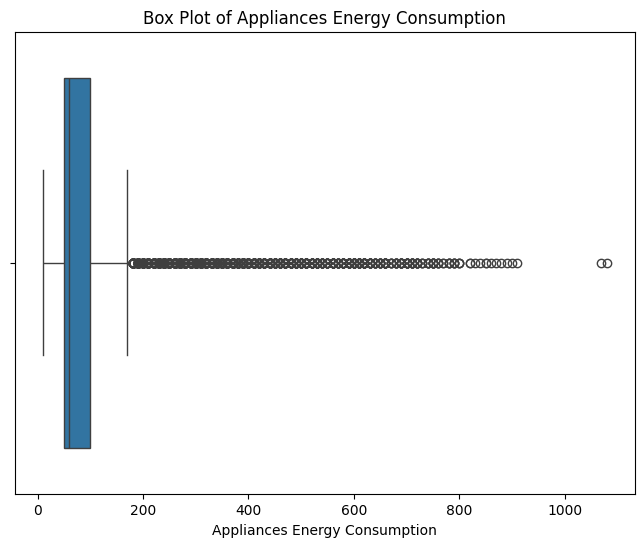

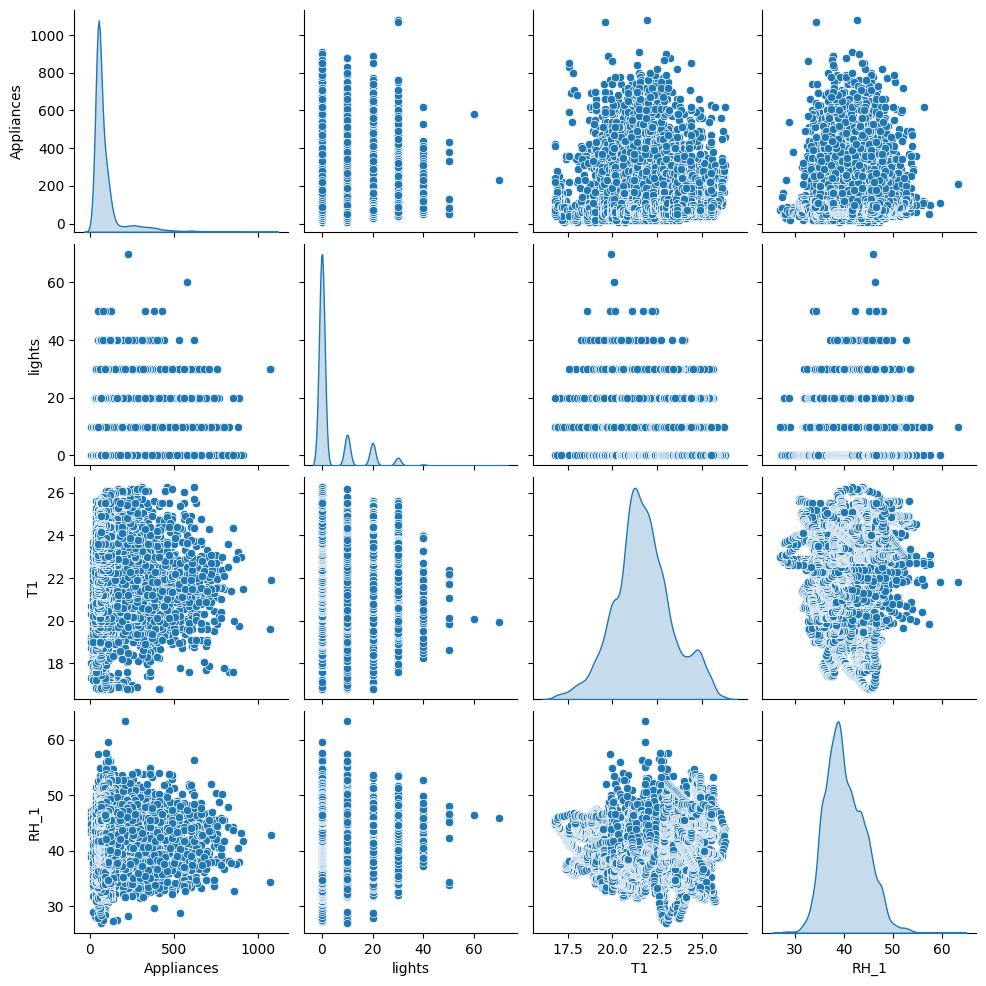

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns # import seaborn
import pandas as pd # import pandas

# Load the dataframe into the 'data' variable.
data = pd.read_csv('/data_application_energy.csv') # load your data into a pandas dataframe

# Convert 'date' column to datetime object
data['date'] = pd.to_datetime(data['date'])

# 1. Distribution of the target variable (Appliances energy consumption)
plt.figure(figsize=(8, 6))
sns.histplot(data['Appliances'], kde=True)
plt.title('Distribution of Appliances Energy Consumption')
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation matrix to identify relationships between features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 3. Scatter plot to visualize the relationship between two features and the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lights', y='Appliances', data=data)
plt.title('Relationship between Lights and Appliances Energy Consumption')
plt.xlabel('Lights')
plt.ylabel('Appliances Energy Consumption')
plt.show()


# 4. Box plot to identify outliers in a specific feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='Appliances', data=data)
plt.title('Box Plot of Appliances Energy Consumption')
plt.xlabel('Appliances Energy Consumption')
plt.show()


# 5. Pair plot to visualize relationships between multiple features and the target variable
sns.pairplot(data[['Appliances', 'lights', 'T1', 'RH_1']], diag_kind='kde')
plt.show()

## RMSE and R-Squared Values

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Load the dataframe into the 'data' variable.
data = pd.read_csv('/data_application_energy.csv') # load your data into a pandas dataframe

# Convert 'date' column to datetime object
data['date'] = pd.to_datetime(data['date'])

# Extract features from the 'date' column
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# Drop the original 'date' column
data = data.drop('date', axis=1)

X = data.drop('Appliances', axis=1)  # Replace 'target_variable' with your actual target column name
y = data['Appliances']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 91.09288554380794
R-squared: 0.17079661624937892


## Linear Regression Graph

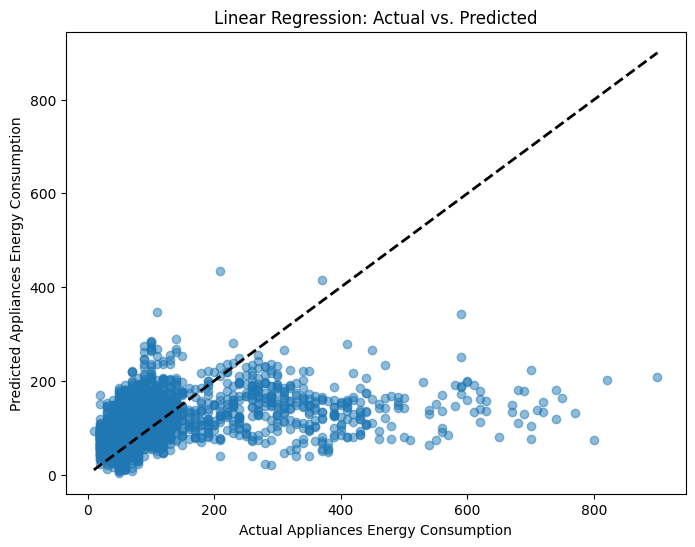

In [15]:
# prompt: Generate Linear Regression Graph

import matplotlib.pyplot as plt

# Assuming you have already trained your model and have y_test and y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Appliances Energy Consumption')
plt.ylabel('Predicted Appliances Energy Consumption')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()
